In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
%matplotlib inline
#matplotlib.use("Agg")
sns.set_style('darkgrid')
myPal= sns.dark_palette("#50f492", 1000)

__Enter the file names below__

In [2]:
#Tilt off / inverters = FALSE
fileName1 = '20190621_1.txt'

#Tilt on / inverters = FALSE
fileName2 = "20190621_2.txt"

#Tilt on / inverters = TRUE
fileName3 = "20190621_3.txt"

#Turbulence Off / inverters = FALSE
fileName4 = '20190622_1.txt'

#Turbulence on / inverters = FALSE
fileName5 = "20190622_2.txt"

#Turbulence on / inverters = TRUE
fileName6 = "20190622_3.txt"

listFiles = [fileName1,fileName2,fileName3,fileName4,fileName5,fileName6]

In [3]:
#Checking if the file extension is not '.csv', if so adjust the formatation
j=0
for k in listFiles:
    if k.split('.')[1] == 'txt':
        with open(k, 'r') as inFile, \
             open(k.split('.')[0]+'.csv', 'w') as outFile:
                 data = inFile.read()
                 data = data.replace('{','')
                 data = data.replace('}','')
                 data = data.replace('\n ','')
                 data = data.replace(' ','')
                 outFile.write('X1,Y1,X2,Y2,C1,C2,Cc,Year,Month,Day,Hours,Minutes,Seconds,LaserPower\n')
                 outFile.write(data)
                 listFiles[j]=k.split('.')[0]+'.csv'
    j=j+1
 
data1 = pd.read_csv(listFiles[0])
data2 = pd.read_csv(listFiles[1])
data3 = pd.read_csv(listFiles[2])
data4 = pd.read_csv(listFiles[3])
data5 = pd.read_csv(listFiles[4])
data6 = pd.read_csv(listFiles[5])
listDatas=[data1,data2,data3,data4,data5,data6]

In [4]:
for k in listDatas:
    for i in k.columns[4:]:
        k[i].apply(lambda x: int(x))
    
for k in listDatas:   
    k['Time'] = k['Hours']*3600 + k['Minutes']*60 + k['Seconds']
    k['Time'] = k['Time'] - k['Time'][0]
    
#listDatas[4].head(3)

__Simple-count heatmaps of both D1 and D2 (Tilt)__

In [5]:
listMax = np.array([])
listMin = np.array([])
for k in listDatas[:3]:
    listMax = np.append(listMax,k.pivot_table(values='C1',index='Y1',columns='X1').max().max())
    listMin = np.append(listMin,k.pivot_table(values='C1',index='Y1',columns='X1').min().min())

    listMax = np.append(listMax,k.pivot_table(values='C2',index='Y2',columns='X2').max().max())
    listMin = np.append(listMin,k.pivot_table(values='C2',index='Y2',columns='X2').min().min())

maxToCbar = listMax.max()
minToCbar = listMin.min()

cbarTicks = np.linspace(start=minToCbar,stop=maxToCbar,num=5,dtype=int)
#ytickLabels = ['-0.5','','-0.4','','-0.3','','-0.2','','-0.1','','0.0','','0.1','','0.2','','0.3','','0.4','','0.5']
#xtickLabels = ['-0.8','','-0.7','','-0.6','','-0.5','','-0.4','','-0.3','','-0.2','','-0.1','','0.0','','0.1','','0.2','','0.3','','0.4','','0.5','','0.6','','0.7','','0.8']

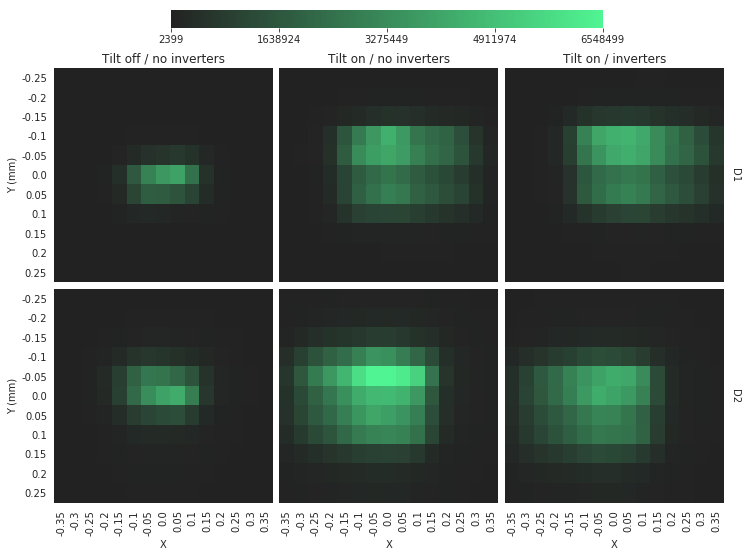

In [6]:
fig, ax = plt.subplots(2,3,figsize=(12,8),sharex=True,sharey=True)
cbar_ax = fig.add_axes([0.26, 0.95, .5, .03])

for j in [0,1,2]:
    sns.heatmap(listDatas[j].pivot_table(values='C1',index='Y1',columns='X1'), ax=ax[0][j],cbar=False,vmin=minToCbar,vmax=maxToCbar,cmap=myPal)
    sns.heatmap(listDatas[j].pivot_table(values='C2',index='Y2',columns='X2'), ax=ax[1][j],cbar=j==0,vmin=minToCbar,vmax=maxToCbar,
            cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal","ticks":cbarTicks},cmap=myPal, yticklabels=j!=0)

ax[0][1].set_ylabel('')
ax[0][1].set_xlabel('')
ax[0][1].set_title('Tilt on / no inverters')

ax[0][2].text(1.05, 0.5, 'D1',horizontalalignment='center',verticalalignment='center',rotation=-90,transform=ax[0][2].transAxes)
ax[1][2].text(1.05, 0.5, 'D2',horizontalalignment='center',verticalalignment='center',rotation=-90,transform=ax[1][2].transAxes)

ax[0][0].set_ylabel('Y (mm)')
ax[0][0].set_xlabel('')
ax[0][0].set_title('Tilt off / no inverters')
#ax[0][0].set_yticklabels(ytickLabels)

ax[1][0].set_ylabel('Y (mm)')
ax[1][0].set_xlabel('X')
#ax[1][0].set_xticklabels(xtickLabels)

ax[0][2].set_title('Tilt on / inverters')
ax[0][2].set_xlabel('')


ax[1][1].set_ylabel('')
ax[1][1].set_xlabel('X')

ax[1][2].set_ylabel('')
ax[1][2].set_xlabel('X')

plt.subplots_adjust(wspace=0.03,hspace=0.03)

__CC heatmap - Tilt__

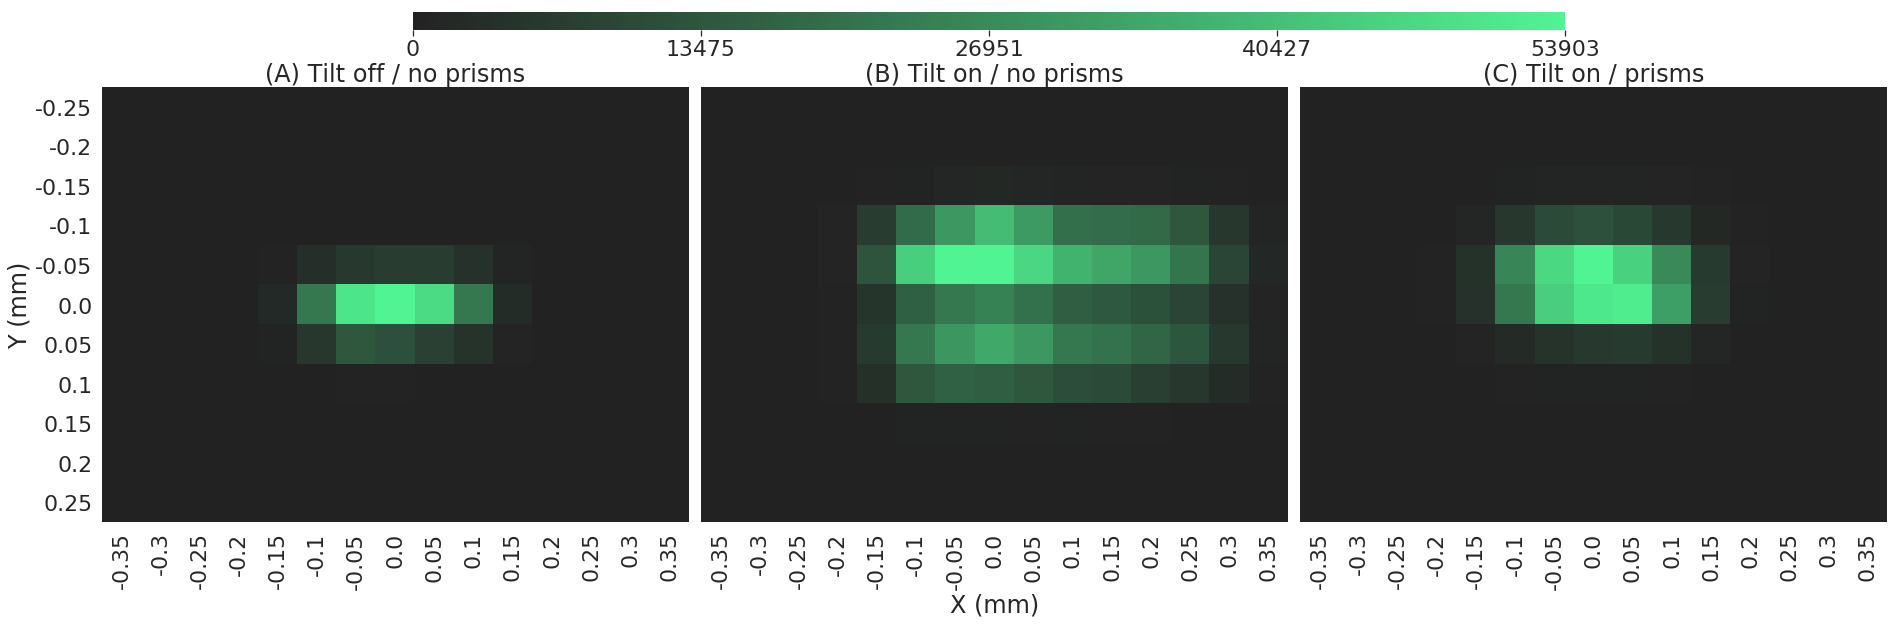

In [17]:
cc1 = listDatas[0].pivot_table(values='Cc',index='Y1',columns='X1')
cc2 = listDatas[1].pivot_table(values='Cc',index='Y1',columns='X1')
cc3 = listDatas[2].pivot_table(values='Cc',index='Y1',columns='X1')
listCc = [cc1,cc2,cc3]
listMax = listMin = np.array([])

for k in listCc:
    listMax = np.append(listMax,k.max().max())
    listMin = np.append(listMin,k.min().min())
    
maxToCbar = listMax.max()
minToCbar = listMin.min()
cbarTicks = np.linspace(start=minToCbar,stop=maxToCbar,num=5,dtype=int)

figCc, axCc = plt.subplots(1,3,figsize=(32,8))
cbar_ax = figCc.add_axes([0.26, 0.98, .5, .03])

for k in [0,1,2]:
#sns.heatmap(ccOnDf, cmap=myPal,ax=axCc[0],cbar_kws={"ticks":cbarTicks}, cbar=False)
    sns.heatmap(listCc[k], cmap=myPal,ax=axCc[k], yticklabels=k==0,cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal","ticks":cbarTicks},cbar=k==0, rasterized=True)

axCc[0].set_ylabel('Y (mm)')
axCc[0].set_xlabel('')
#axCc[0].set_yticklabels(ytickLabels)
#axCc[0].set_xticklabels(xtickLabels)
axCc[0].set_title('(A) Tilt off / no prisms')

axCc[1].set_ylabel('')
axCc[1].set_xlabel('X (mm)')
axCc[1].set_title('(B) Tilt on / no prisms')
#axCc[1].set_xticklabels(xtickLabels)


axCc[2].set_ylabel('')
axCc[2].set_xlabel('')
axCc[2].set_title('(C) Tilt on / prisms')
#axCc[2].set_xticklabels(xtickLabels)
sns.set(font_scale=2.0)
plt.subplots_adjust(wspace=0.02)
#plt.savefig('coincInTilt.pdf',format='pdf')



__Integration over X and Y (tilt)__

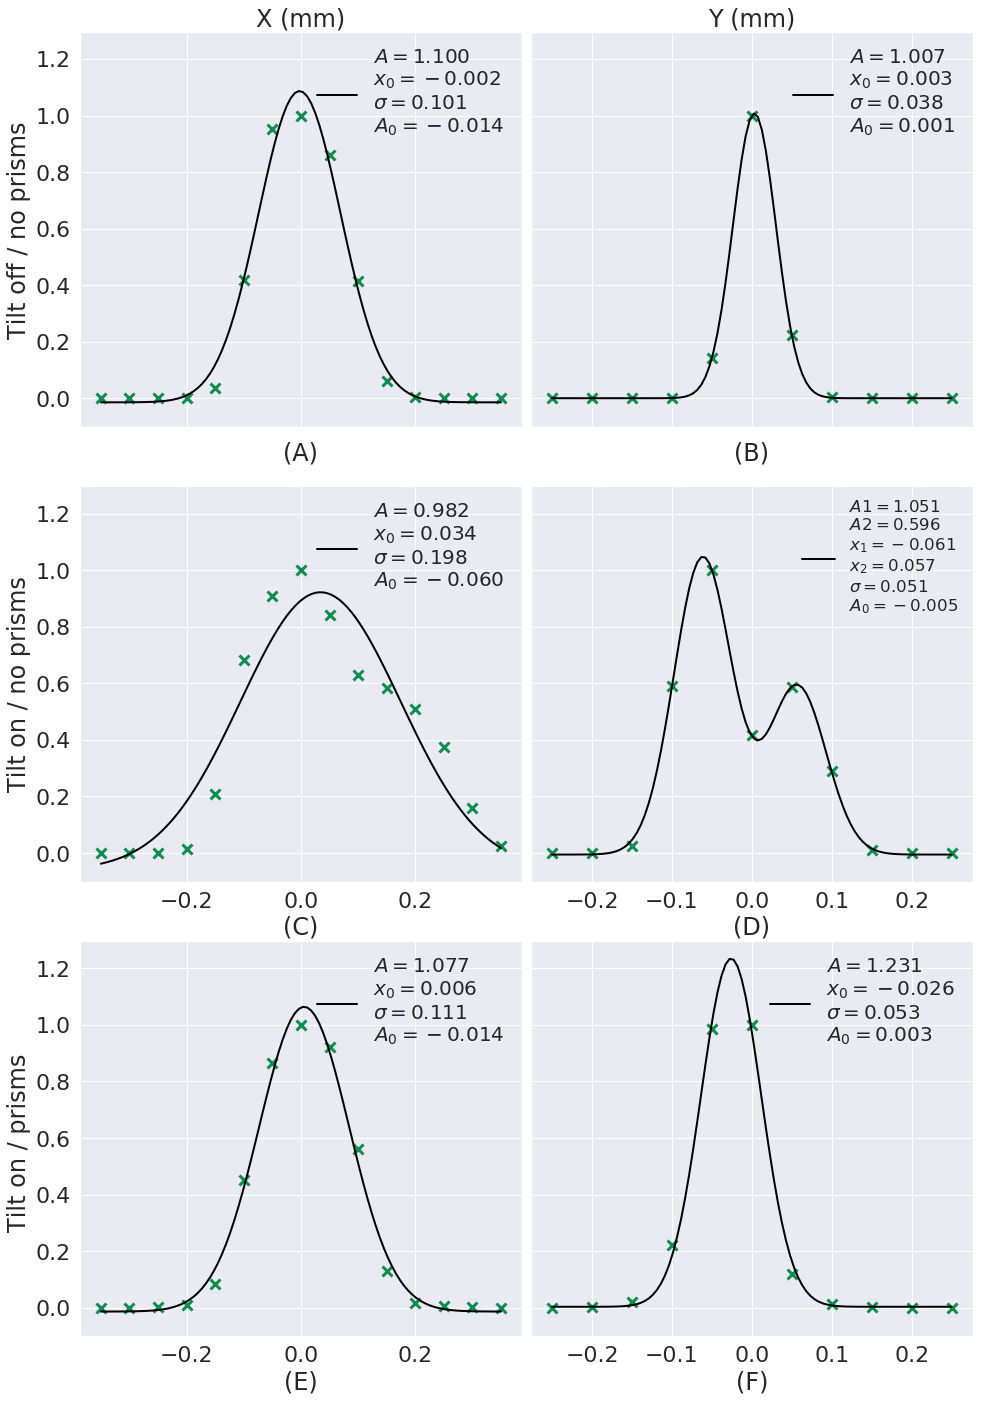

In [8]:
sns.set_style('darkgrid')
def model1(x,A,x0,sigma,ofst):
    return ofst+A*np.exp(-((x-x0)/sigma)**2)

def model2(x,A1,A2,x1,x2,sigma,ofst):
    return ofst+A1*np.exp(-((x-x1)/sigma)**2) + A2*np.exp(-((x-x2)/sigma)**2)

poptlist = []
ccProfList = []
pCovList = []
aux=0
for ccA in listCc:
    ccProfList.append(ccA.aggregate("sum",axis='rows') / ccA.aggregate("sum",axis='rows').max())
    ccProfList.append(ccA.aggregate("sum",axis='columns') / ccA.aggregate("sum",axis='columns').max())
    poptlist.append(curve_fit(model1, xdata=ccProfList[aux].index, ydata=ccProfList[aux].values, p0=(1.,0.,0.1,0.1))[0])
    pCovList.append(curve_fit(model1, xdata=ccProfList[aux].index, ydata=ccProfList[aux].values, p0=(1.,0.,0.1,0.1))[1])
    if (aux+1)==3:    
        poptlist.append(curve_fit(model2, xdata=ccProfList[aux+1].index, ydata=ccProfList[aux+1].values, p0=(0.7,0.7,-0.05,0.08,0.04,0.3))[0])
        pCovList.append(curve_fit(model2, xdata=ccProfList[aux+1].index, ydata=ccProfList[aux+1].values, p0=(0.7,0.7,-0.05,0.08,0.04,0.3))[1])
    else:
        poptlist.append(curve_fit(model1, xdata=ccProfList[aux+1].index, ydata=ccProfList[aux+1].values, p0=(1.,0.,0.1,0.1))[0])
        pCovList.append(curve_fit(model1, xdata=ccProfList[aux+1].index, ydata=ccProfList[aux+1].values, p0=(1.,0.,0.1,0.1))[1])
    aux=aux+2

# i=0
# j=1
# for k in ccProfList:    
#     with open('ccProfile-{XorY}_case_{case}_TILT.txt'.format(XorY="X" if i ==0 else "Y", case=j), 'w') as outFile:
#         for x, y in zip(k.index,k.values):
#             outFile.write('{%.4f,%.6f}\n'%(x,y))
#     j = j+1 if i==1 else j    
#     i = 0 if i==1 else i+1
                
figInt, axInt = plt.subplots(3,2,figsize=(16,24), sharey=True, sharex=False)
aux=0
for v1 in ccProfList:
        if aux<=1:
            j=0
        else:
            if aux<=3:
                j=1
            else:
                j=2
        sns.scatterplot(data=v1, ax=axInt[j][0 if aux%2==0 else 1], linewidth=3.0, marker='x',color='#0F8D51',s=100)
        if aux==3:
            sns.lineplot(x=np.linspace(v1.index.min(),v1.index.max(),num=100),y=model2(np.linspace(v1.index.min(),v1.index.max(),num=100),*poptlist[aux]), 
                         ax=axInt[j][0 if aux%2==0 else 1], color="black", linewidth=2.0,
                         label=r'$A1=%5.3f$'
                         '\n'
                         r'$A2=%5.3f$'
                         '\n'
                         r'$x_1=%5.3f$'
                         '\n'
                         r'$x_2=%5.3f$'
                         '\n'
                         r'$\sigma=%5.3f$' 
                         '\n'
                         r'$A_0=%5.3f$' % tuple(poptlist[aux]))
        else:
            sns.lineplot(x=np.linspace(v1.index.min(),v1.index.max(),num=100),y=model1(np.linspace(v1.index.min(),v1.index.max(),num=100),*poptlist[aux]), 
                         ax=axInt[j][0 if aux%2==0 else 1], color="black", linewidth=2.0,
                         label=r'$A=%5.3f$'
                         '\n'
                         r'$x_0=%5.3f$'
                         '\n'
                         r'$\sigma=%5.3f$' 
                         '\n'
                         r'$A_0=%5.3f$' % tuple(poptlist[aux]))
        if aux<2:
            axInt[0][aux].set_xlabel('(A)') if aux==0 else axInt[0][aux].set_xlabel('(B)')
            axInt[0][aux].set_title('X (mm)') if aux==0 else axInt[0][aux].set_title('Y (mm)')
            axInt[0][aux].set_ylabel('Tilt off / no prisms') if aux==0 else axInt[0][aux].set_ylabel('')
            axInt[0][aux].set(xticklabels=[])
            axInt[0][aux].legend(loc='upper right', frameon=False, fontsize='small')
        else:
            if aux<4:
                axInt[1][aux-2].set_xlabel('(C)') if aux==2 else axInt[1][aux-2].set_xlabel('(D)')
                axInt[1][aux-2].set_ylabel('Tilt on / no prisms') if aux==2 else axInt[1][aux-2].set_ylabel('')
                axInt[1][aux-2].legend(loc='upper right', frameon=False, fontsize='small') if aux==2 else axInt[1][aux-2].legend(loc='upper right', frameon=False, fontsize='x-small')
            else:
                axInt[2][aux-4].set_xlabel('(E)') if aux==4 else axInt[2][aux-4].set_xlabel('(F)')
                axInt[2][aux-4].set_ylabel('Tilt on / prisms ') if aux==4 else axInt[2][aux-4].set_ylabel('')
                axInt[2][aux-4].legend(loc='upper right', frameon=False, fontsize='small')
        aux=aux+1
 
aux=0
plt.subplots_adjust(wspace=0.02,hspace=0.15)
plt.savefig('xyprofInTilt.pdf',format='pdf')


In [9]:
np.sqrt(np.diag(pCovList[5]))[2], poptlist[5][2]

(0.001903719740059679, 0.05331323707148537)

__Simple-count heatmaps of both D1 and D2 (Turbulence)__

In [10]:
listMax = np.array([])
listMin = np.array([])
for k in [data4,data5,data6]:
    listMax = np.append(listMax,k.pivot_table(values='C1',index='Y1',columns='X1').max().max())
    listMin = np.append(listMin,k.pivot_table(values='C1',index='Y1',columns='X1').min().min())

    listMax = np.append(listMax,k.pivot_table(values='C2',index='Y2',columns='X2').max().max())
    listMin = np.append(listMin,k.pivot_table(values='C2',index='Y2',columns='X2').min().min())

maxToCbar = listMax.max()
minToCbar = listMin.min()

cbarTicks = np.linspace(start=minToCbar,stop=maxToCbar,num=5,dtype=int)

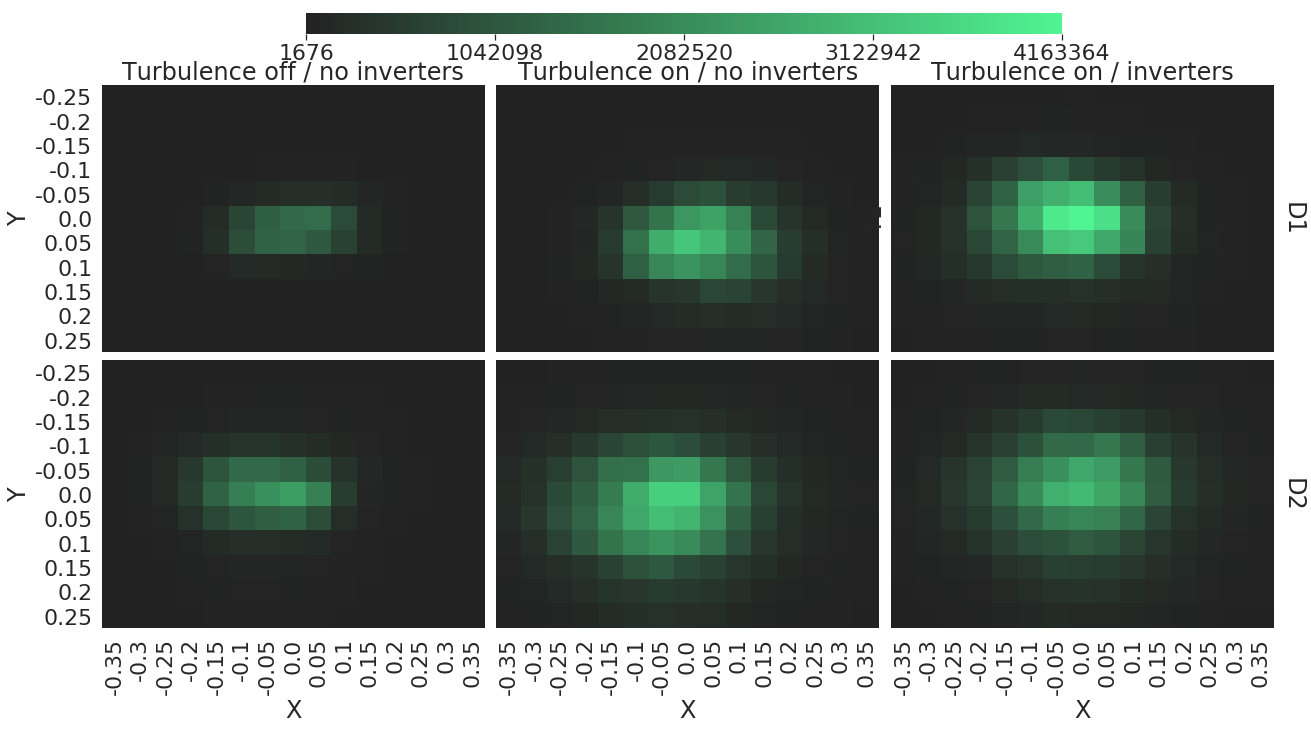

In [11]:
sizeX= int(20*data4['X1'].max())
sizeY= int(20*data4['Y1'].max())
fig, ax = plt.subplots(2,3,figsize=(3*sizeX,2*sizeY),sharex=True,sharey=True)
cbar_ax = fig.add_axes([0.26, 0.95, .5, .03])

for j in [3,4,5]:
    sns.heatmap(listDatas[j].pivot_table(values='C1',index='Y1',columns='X1'), ax=ax[0][j-3],cbar=False,vmin=minToCbar,vmax=maxToCbar,cmap=myPal)
    sns.heatmap(listDatas[j].pivot_table(values='C2',index='Y2',columns='X2'), ax=ax[1][j-3],cbar=j==3,vmin=minToCbar,vmax=maxToCbar,
            cbar_ax=cbar_ax,cbar_kws={"orientation": "horizontal","ticks":cbarTicks},cmap=myPal, yticklabels=j!=3)

ax[0][1].set_ylabel('')
ax[0][1].set_xlabel('')
ax[0][1].set_title('Turbulence on / no inverters')

ax[0][2].text(1.05, 0.5, 'D1',horizontalalignment='center',verticalalignment='center',rotation=-90,transform=ax[0][2].transAxes)
ax[1][2].text(1.05, 0.5, 'D2',horizontalalignment='center',verticalalignment='center',rotation=-90,transform=ax[1][2].transAxes)

ax[0][0].set_ylabel('Y')
ax[0][0].set_xlabel('')
ax[0][0].set_title('Turbulence off / no inverters')
#ax[0][0].set_yticklabels(ytickLabels)

ax[1][0].set_ylabel('Y')
ax[1][0].set_xlabel('X')

ax[0][2].set_title('Turbulence on / inverters')
ax[0][2].set_xlabel('')


ax[1][1].set_ylabel('')
ax[1][1].set_xlabel('X')

ax[1][2].set_ylabel('')
ax[1][2].set_xlabel('X')

plt.subplots_adjust(wspace=0.03,hspace=0.03)
sns.set(font_scale=2.0)

__CC heatmap - Turbulence__

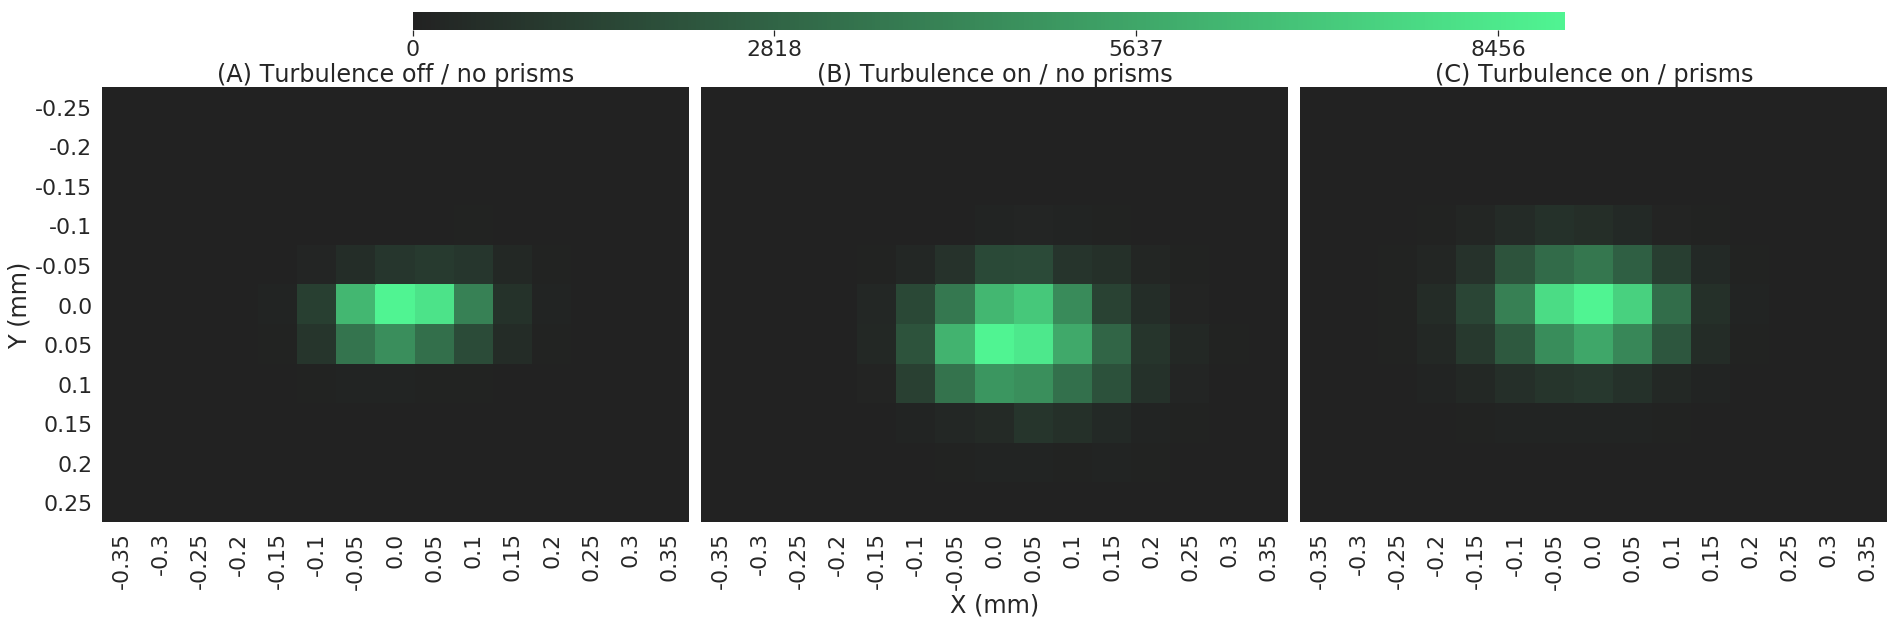

In [16]:
cc1 = listDatas[3].pivot_table(values='Cc',index='Y1',columns='X1')
cc2 = listDatas[4].pivot_table(values='Cc',index='Y1',columns='X1')
cc3 = listDatas[5].pivot_table(values='Cc',index='Y1',columns='X1')
listCc = [cc1,cc2,cc3]
listMax = listMin = np.array([])

for k in listCc:
    listMax = np.append(listMax,k.max().max())
    listMin = np.append(listMin,k.min().min())
    
maxToCbar = listMax.max()
minToCbar = listMin.min()
cbarTicks = np.linspace(start=minToCbar,stop=maxToCbar,num=5,dtype=int)

figCc, axCc = plt.subplots(1,3,figsize=(32,8))
cbar_ax = figCc.add_axes([0.26, 0.98, .5, .03])

for k in [0,1,2]:
    sns.heatmap(listCc[k], cmap=myPal,ax=axCc[k], yticklabels=k==0,cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal","ticks":cbarTicks},cbar=k==0, rasterized=True)

axCc[0].set_ylabel('Y (mm)')
axCc[0].set_xlabel('')
axCc[0].set_title('(A) Turbulence off / no prisms')
#axCc[0].set_yticklabels(ytickLabels)

axCc[1].set_ylabel('')
axCc[1].set_xlabel('X (mm)')
axCc[1].set_title('(B) Turbulence on / no prisms')

axCc[2].set_ylabel('')
axCc[2].set_xlabel('')
axCc[2].set_title('(C) Turbulence on / prisms')
sns.set(font_scale=2.0)
plt.subplots_adjust(wspace=0.02)
plt.savefig('coincInTurb2.pdf',format='pdf')


__Integration over X and Y (turb)__

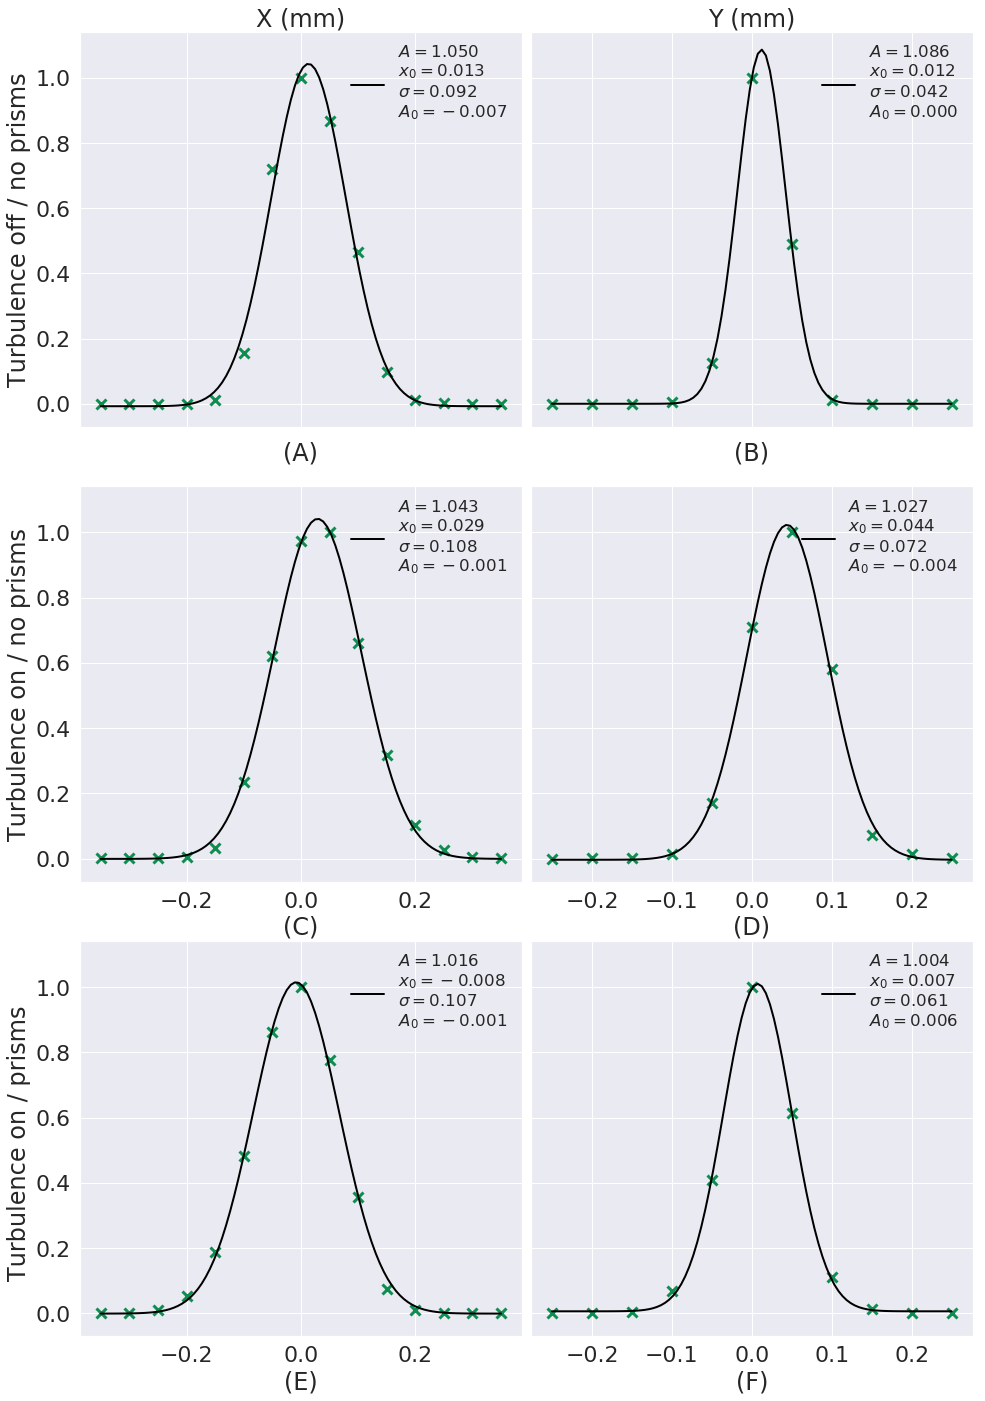

In [9]:
sns.set_style('darkgrid')
def model(x,A,x0,sigma,ofst):
    return ofst+A*np.exp(-((x-x0)/sigma)**2)

poptlist = []
ccProfList = []
pCovList = []
aux=0
for ccA in listCc:
    ccProfList.append(ccA.aggregate("sum",axis='rows') / ccA.aggregate("sum",axis='rows').max())
    ccProfList.append(ccA.aggregate("sum",axis='columns') / ccA.aggregate("sum",axis='columns').max())
    poptlist.append(curve_fit(model, xdata=ccProfList[aux].index, ydata=ccProfList[aux].values, p0=(1.,0.,0.1,0.1))[0])
    pCovList.append(curve_fit(model, xdata=ccProfList[aux].index, ydata=ccProfList[aux].values, p0=(1.,0.,0.1,0.1))[1])
    poptlist.append(curve_fit(model, xdata=ccProfList[aux+1].index, ydata=ccProfList[aux+1].values, p0=(1.,0.,0.1,0.1))[0])
    pCovList.append(curve_fit(model, xdata=ccProfList[aux+1].index, ydata=ccProfList[aux+1].values, p0=(1.,0.,0.1,0.1))[1])
    aux=aux+2 

i=0
j=1
for k in ccProfList:    
    with open('ccProfile-{XorY}_case_{case}_TURB.txt'.format(XorY="X" if i ==0 else "Y", case=j), 'w') as outFile:
        for x, y in zip(k.index,k.values):
            outFile.write('{%.4f,%.6f}\n'%(x,y))
    j = j+1 if i==1 else j
    i = 0 if i==1 else i+1

figInt, axInt = plt.subplots(3,2,figsize=(16,24), sharey=True, sharex=False)
aux=0
for v1 in ccProfList:
        if aux<=1:
            j=0
        else:
            if aux<=3:
                j=1
            else:
                j=2
        sns.scatterplot(data=v1, ax=axInt[j][0 if aux%2==0 else 1], linewidth=3.0, marker='x',color='#0F8D51',s=100)
        sns.lineplot(x=np.linspace(v1.index.min(),v1.index.max(),num=100),y=model(np.linspace(v1.index.min(),v1.index.max(),num=100),*poptlist[aux]), 
                     ax=axInt[j][0 if aux%2==0 else 1], color="black", linewidth=2.0,
                     label=r'$A=%5.3f$'
                     '\n'
                     r'$x_0=%5.3f$'
                     '\n'
                     r'$\sigma=%5.3f$' 
                     '\n'
                     r'$A_0=%5.3f$' % tuple(poptlist[aux]))
        if aux<2:
            axInt[0][aux].set_xlabel('(A)') if aux==0 else axInt[0][aux].set_xlabel('(B)')
            axInt[0][aux].set_title('X (mm)') if aux==0 else axInt[0][aux].set_title('Y (mm)')
            axInt[0][aux].set_ylabel('Turbulence off / no prisms') if aux==0 else axInt[0][aux].set_ylabel('')
            axInt[0][aux].set(xticklabels=[])
            axInt[0][aux].legend(loc='upper right', frameon=False, fontsize='x-small')
        else:
            if aux<4:
                axInt[1][aux-2].set_xlabel('(C)') if aux==2 else axInt[1][aux-2].set_xlabel('(D)')
                axInt[1][aux-2].set_ylabel('Turbulence on / no prisms') if aux==2 else axInt[1][aux-2].set_ylabel('')
                axInt[1][aux-2].legend(loc='upper right', frameon=False, fontsize='x-small')
            else:
                axInt[2][aux-4].set_xlabel('(E)') if aux==4 else axInt[2][aux-4].set_xlabel('(F)')
                axInt[2][aux-4].set_ylabel('Turbulence on / prisms ') if aux==4 else axInt[2][aux-4].set_ylabel('')
                axInt[2][aux-4].legend(loc='upper right', frameon=False, fontsize='x-small')
        aux=aux+1
 
aux=0
plt.subplots_adjust(wspace=0.02,hspace=0.15)
plt.savefig('xyprofInTurb.pdf',format='pdf')


In [13]:
np.sqrt(np.diag(pCovList[1]))[2], poptlist[1][2]

(0.0001530365497471999, 0.042331984544092725)